## Preliminary EDA for 2018 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',None)

### Import Bridge data

*OJO TAMBIEN HABRÍA QUE SUBIR LOS DATOS DE ELEVATIONS O DE PRECIPITACIONES SI METEMOS ESTADOS CON OTRO CLIMA*

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [4]:
total18 = pd.read_csv('2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2.0,2017.0,NaN,NaN,NaN,0.0,N,2,NaN,

In [6]:
total18.shape

(616096, 137)

There are 616096 bridges on the datasets and 137 columns with variables.


In [7]:
list(total18.columns)

Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'DTL_TYPE_OF_IMP', 'SPECIAL_CODE', 'STEP_CODE', 'STATUS_WITH_10YR_RULE',
       'SUFFICIENCY_ASTERC', 'SUFFICIENCY_RATING', 'STATUS_NO_10YR_RULE',
       'CAT10', 'CAT23', 'CAT29'],
      dtype='object', length=137)

In [14]:
total18.dtypes

STATE_CODE_001              int64
STRUCTURE_NUMBER_008       object
RECORD_TYPE_005A            int64
ROUTE_PREFIX_005B         float64
SERVICE_LEVEL_005C        float64
ROUTE_NUMBER_005D          object
DIRECTION_005E            float64
HIGHWAY_DISTRICT_002       object
COUNTY_CODE_003           float64
PLACE_CODE_004            float64
FEATURES_DESC_006A         object
CRITICAL_FACILITY_006B    float64
FACILITY_CARRIED_007       object
LOCATION_009               object
MIN_VERT_CLR_010          float64
KILOPOINT_011             float64
BASE_HWY_NETWORK_012      float64
LRS_INV_ROUTE_013A         object
SUBROUTE_NO_013B          float64
LAT_016                   float64
LONG_017                  float64
DETOUR_KILOS_019            int64
TOLL_020                    int64
MAINTENANCE_021             int64
OWNER_022                   int64
FUNCTIONAL_CLASS_026        int64
YEAR_BUILT_027            float64
TRAFFIC_LANES_ON_028A       int64
TRAFFIC_LANES_UND_028B      int64
ADT_029       

As a first approach, we will be interested on working with the bridges of Pennsylvania and Ohio, whose codes are 42 and 39 respectively.

In [15]:
mystates = [42,39]
df18 = total18[total18['STATE_CODE_001'].isin(mystates)]

In [16]:
df18.shape

(50014, 137)

In [17]:
# Let's save this dataframe as a csv file since this will be the dataframe we will be performing our EDA on.
df18.to_csv (r'./df18.csv', index = None, header=True)

In [2]:
df18 = pd.read_csv('df18.csv')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,17,75,98,102,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 


1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts
2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge

In [4]:
#The culverts will be dropped out of our dataset

data18 = df18.loc[df18['CULVERT_COND_062']=='N']

In [23]:
data18.shape

(45552, 137)

In [5]:
#Drop bridges built before 1900 due to material standards

data18 = data18[data18['YEAR_BUILT_027']>1900]

In [25]:
data18.shape

(43993, 137)

In [16]:
data18 = data18[data18['STRUCTURE_LEN_MT_049']<=400]

In [17]:
data18.shape

(43662, 137)

In [29]:
data18 = data18[data18['MAIN_UNIT_SPANS_045']<50]


In [30]:
data18.shape

(43658, 137)

In [6]:
list(data18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

(array([2.0000e+00, 2.6568e+04, 4.2740e+03, 8.6260e+03, 2.6840e+03,
        6.3400e+02, 3.3300e+02, 0.0000e+00, 1.7700e+02, 1.1500e+02,
        6.6000e+01, 4.9000e+01, 3.0000e+01, 2.4000e+01, 0.0000e+00,
        1.9000e+01, 8.0000e+00, 7.0000e+00, 5.0000e+00, 5.0000e+00,
        8.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.86,  1.72,  2.58,  3.44,  4.3 ,  5.16,  6.02,  6.88,
         7.74,  8.6 ,  9.46, 10.32, 11.18, 12.04, 12.9 , 13.76, 14.62,
        15.48, 16.34, 17.2 , 18.06, 18.92, 19.78, 20.64, 21.5 , 22.36,
        23.22, 24.08, 24.94, 25.8 , 26.66, 27.52, 28.38, 29.24, 30.1 ,
        30.96, 31.82, 32.68, 33.54

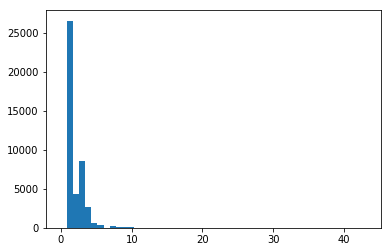

In [31]:
plt.hist(data18['MAIN_UNIT_SPANS_045'],bins=50)

In [32]:
data18['MAIN_UNIT_SPANS_045'].describe()

count    43658.000000
mean         1.881717
std          1.509840
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         43.000000
Name: MAIN_UNIT_SPANS_045, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f938b316a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f938b316eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f938b316668>],
 'medians': [<matplotlib.lines.Line2D at 0x7f938b3287f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f938b328b38>],
 'means': []}

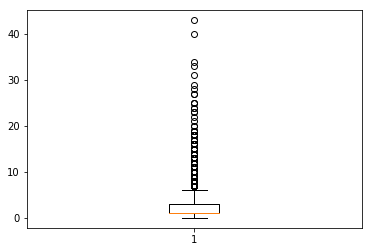

In [33]:
plt.boxplot(data18['MAIN_UNIT_SPANS_045'])

In [35]:
data18[data18['MAIN_UNIT_SPANS_045']>5].count()

STATE_CODE_001            870
STRUCTURE_NUMBER_008      870
RECORD_TYPE_005A          870
ROUTE_PREFIX_005B         870
SERVICE_LEVEL_005C        870
ROUTE_NUMBER_005D         870
DIRECTION_005E            870
HIGHWAY_DISTRICT_002      870
COUNTY_CODE_003           870
PLACE_CODE_004            870
FEATURES_DESC_006A        870
CRITICAL_FACILITY_006B      0
FACILITY_CARRIED_007      870
LOCATION_009              870
MIN_VERT_CLR_010          870
KILOPOINT_011             870
BASE_HWY_NETWORK_012      813
LRS_INV_ROUTE_013A        502
SUBROUTE_NO_013B          502
LAT_016                   870
LONG_017                  870
DETOUR_KILOS_019          870
TOLL_020                  870
MAINTENANCE_021           870
OWNER_022                 870
FUNCTIONAL_CLASS_026      870
YEAR_BUILT_027            870
TRAFFIC_LANES_ON_028A     870
TRAFFIC_LANES_UND_028B    870
ADT_029                   870
                         ... 
SURFACE_TYPE_108A         870
MEMBRANE_TYPE_108B        870
DECK_PROTE